In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def clean_tweet(tweet, exclude_words):
    # Remove product names
    for word in exclude_words:
        tweet = re.sub(r'\b' + word + r'\b', '', tweet, flags=re.IGNORECASE)
    # Remove URLs, mentions, special characters, and numbers
    tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word.lower() not in stop_words)
    return tweet


<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\USER\AppData\Local\Temp\ipykernel_20452\2535132224.py:6: SyntaxWarning: invalid escape sequence '\w'
  tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)


In [3]:
# Load dataset
data = pd.read_csv("mobile_phone_tweets_balanced.csv")  # Replace with your training data path

# List of product names to exclude
exclude_words = ['iphone', 'samsung', 'galaxy', 'google', 'pixel', 'oneplus', 'xiaomi']

# Clean the tweet content
data['cleaned_content'] = data['content'].apply(lambda x: clean_tweet(x, exclude_words))


In [4]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_content'])
y = data['sentiment']  # Assuming the training data has a 'sentiment' column with labels


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train and evaluate multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": MultinomialNB()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"\n{model_name} Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Random Forest Accuracy: 0.9050, Precision: 0.9307, Recall: 0.9100, F1-Score: 0.9092

Logistic Regression Accuracy: 0.9050, Precision: 0.9307, Recall: 0.9100, F1-Score: 0.9092

SVM Accuracy: 0.9050, Precision: 0.9307, Recall: 0.9100, F1-Score: 0.9092

Naive Bayes Accuracy: 0.9000, Precision: 0.9262, Recall: 0.9078, F1-Score: 0.9050


In [7]:
# Function to predict sentiment of a tweet
def get_tweet_sentiment(tweet, vectorizer, model, exclude_words):
    cleaned_tweet = clean_tweet(tweet, exclude_words)
    tweet_vector = vectorizer.transform([cleaned_tweet])
    sentiment = model.predict(tweet_vector)[0]
    return sentiment


In [8]:
# Function to process tweets from a CSV file and predict sentiments
def get_tweets_from_csv(file_path, vectorizer, model, exclude_words):
    try:
        data = pd.read_csv(file_path)
        data['predicted_sentiment'] = data['content'].apply(lambda x: get_tweet_sentiment(x, vectorizer, model, exclude_words))
        return data
    except Exception as e:
        print(f"Error reading CSV: {str(e)}")
        return pd.DataFrame()


Tweet: Just got my new OnePlus! Loving it so far.
Predicted Sentiment: positive

Tweet: The display on the Xiaomi is so vibrant and clear.
Predicted Sentiment: positive

Tweet: Experiencing connectivity issues with the Xiaomi.
Predicted Sentiment: neutral

Tweet: Experiencing connectivity issues with the Samsung Galaxy.
Predicted Sentiment: neutral

Tweet: I regret buying the Google Pixel. Not worth the money.
Predicted Sentiment: negative

Tweet: Battery life on the Google Pixel could be better.
Predicted Sentiment: neutral

Tweet: Not too impressed with the OnePlus. Expected more.
Predicted Sentiment: neutral

Tweet: Having some issues with my Xiaomi. Anyone else?
Predicted Sentiment: neutral

Tweet: Really happy with the performance of my new OnePlus.
Predicted Sentiment: positive

Tweet: The Samsung Galaxy has exceeded my expectations!
Predicted Sentiment: positive

Tweet: I'm impressed with the build quality of the Google Pixel.
Predicted Sentiment: positive

Tweet: The iPhone kee

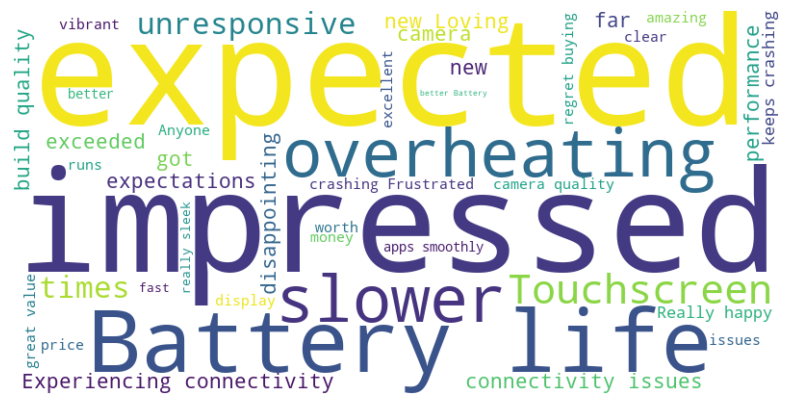

In [9]:
# Path to the new CSV file containing tweets to analyze
new_csv_path = "output.csv"  # Replace with the path to your new CSV file
predicted_tweets = get_tweets_from_csv(new_csv_path, vectorizer, model, exclude_words)

# Display the results
for index, tweet in predicted_tweets.iterrows():
    print(f"Tweet: {tweet['content']}\nPredicted Sentiment: {tweet['predicted_sentiment']}\n")

# Generate a word cloud of all cleaned tweets (excluding product names)
def remove_product_names(tweet, exclude_words):
    for word in exclude_words:
        tweet = re.sub(r'\b' + word + r'\b', '', tweet, flags=re.IGNORECASE)
    return tweet

# Cleaned and processed tweets excluding product names
all_tweets = " ".join(remove_product_names(tweet['content'], exclude_words) for index, tweet in predicted_tweets.iterrows())

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(all_tweets)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


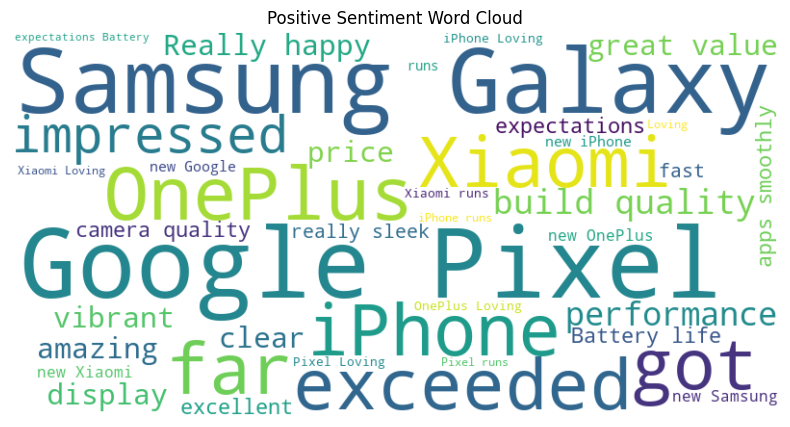

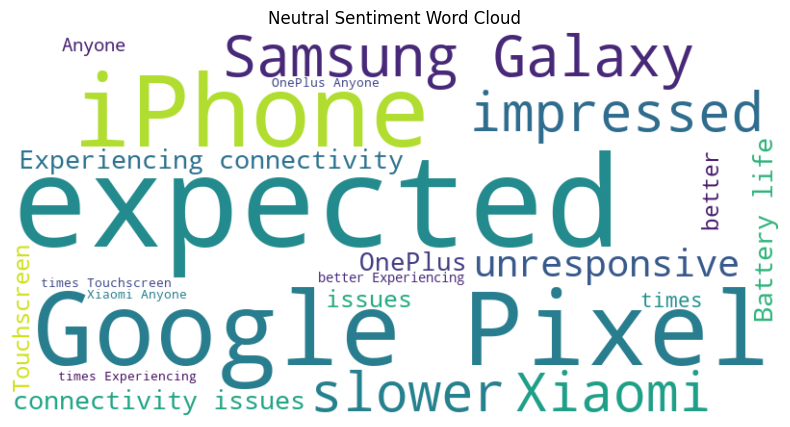

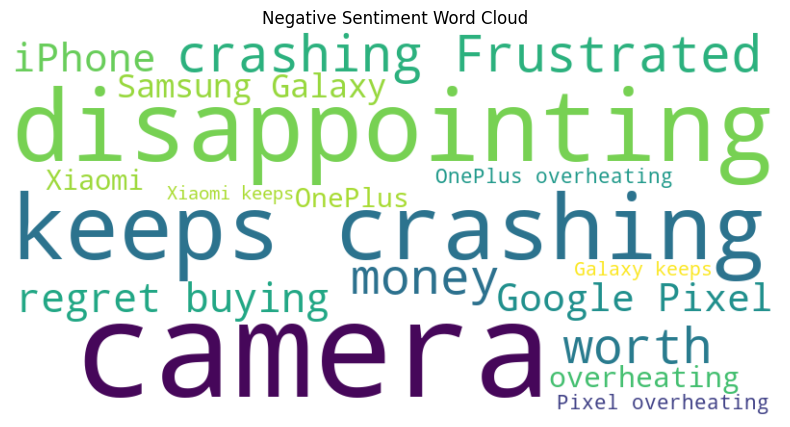

In [10]:
# Assuming you have already trained your sentiment analysis model and predicted sentiments for tweets

# Separate tweets into different sentiment categories
positive_tweets = predicted_tweets[predicted_tweets['predicted_sentiment'] == 'positive']
neutral_tweets = predicted_tweets[predicted_tweets['predicted_sentiment'] == 'neutral']
negative_tweets = predicted_tweets[predicted_tweets['predicted_sentiment'] == 'negative']

# Function to generate and display word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word clouds for each sentiment category
generate_word_cloud(" ".join(positive_tweets['content']), "Positive Sentiment Word Cloud")
generate_word_cloud(" ".join(neutral_tweets['content']), "Neutral Sentiment Word Cloud")
generate_word_cloud(" ".join(negative_tweets['content']), "Negative Sentiment Word Cloud")


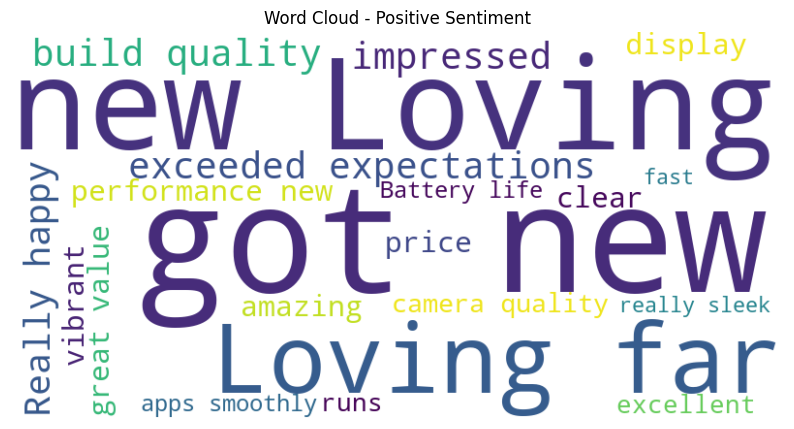

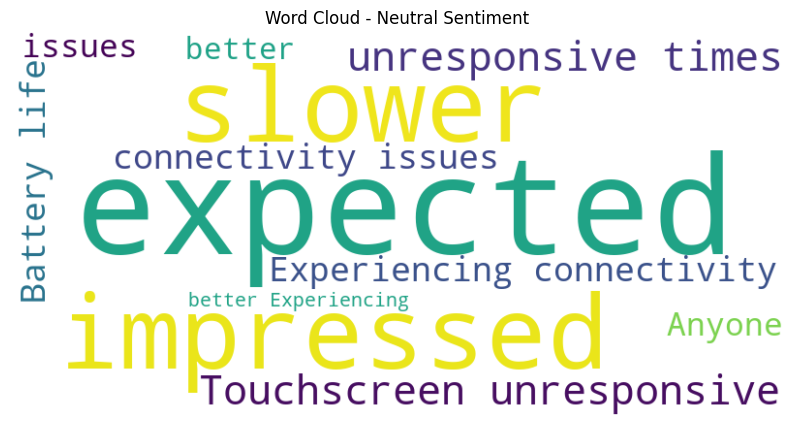

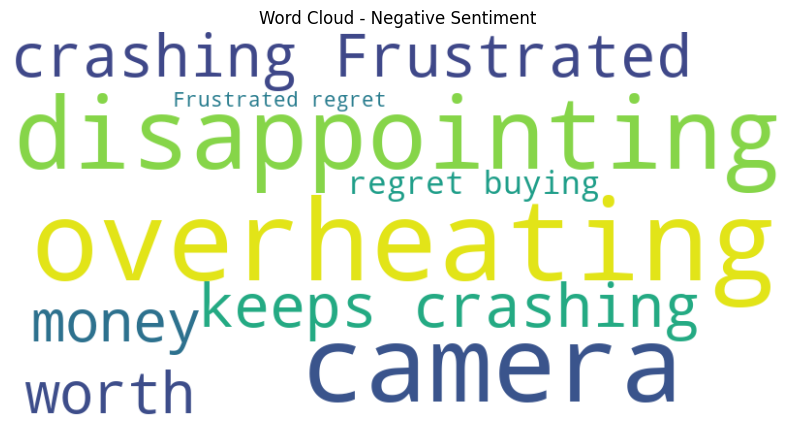

In [11]:
def remove_specific_words(tweet, specific_words, min_length=3):
    # Remove specific words
    for word in specific_words:
        tweet = re.sub(r'\b' + word + r'\b', '', tweet, flags=re.IGNORECASE)
    
    # Remove words less than min_length characters long
    tweet = re.sub(r'\b\w{1,' + str(min_length-1) + r'}\b', '', tweet)
    
    return tweet.strip()
    
   

# Function to generate word cloud from cleaned tweets
def generate_word_cloud(sentiment_tweets, title, background_color="white"):
    all_tweets = " ".join(sentiment_tweets)
    wordcloud = WordCloud(background_color=background_color, width=800, height=400).generate(all_tweets)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Assuming 'predicted_tweets' contains a column 'predicted_sentiment'
positive_tweets = predicted_tweets[predicted_tweets['predicted_sentiment'] == 'positive']['content']
neutral_tweets = predicted_tweets[predicted_tweets['predicted_sentiment'] == 'neutral']['content']
negative_tweets = predicted_tweets[predicted_tweets['predicted_sentiment'] == 'negative']['content']

# List of brand names to exclude
brand_names = ['iphone', 'samsung', 'galaxy', 'google', 'pixel', 'oneplus', 'xiaomi']

# Clean tweets by removing brand names
positive_tweets_cleaned = [remove_specific_words(tweet, brand_names) for tweet in positive_tweets]
neutral_tweets_cleaned = [remove_specific_words(tweet, brand_names) for tweet in neutral_tweets]
negative_tweets_cleaned = [remove_specific_words(tweet, brand_names) for tweet in negative_tweets]

# Generate and display word clouds for each sentiment category
generate_word_cloud(positive_tweets_cleaned, "Word Cloud - Positive Sentiment")
generate_word_cloud(neutral_tweets_cleaned, "Word Cloud - Neutral Sentiment")
generate_word_cloud(negative_tweets_cleaned, "Word Cloud - Negative Sentiment")

<>:65: SyntaxWarning: invalid escape sequence '\P'
<>:65: SyntaxWarning: invalid escape sequence '\P'
C:\Users\USER\AppData\Local\Temp\ipykernel_20452\3468553300.py:65: SyntaxWarning: invalid escape sequence '\P'
  pdfkit.from_file('sentiment_report.html', output_path, configuration=pdfkit.configuration(wkhtmltopdf='"C:\Program Files\wkhtmltopdf'))


Error converting HTML to PDF: No wkhtmltopdf executable found: ""C:\Program Files\wkhtmltopdf"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf


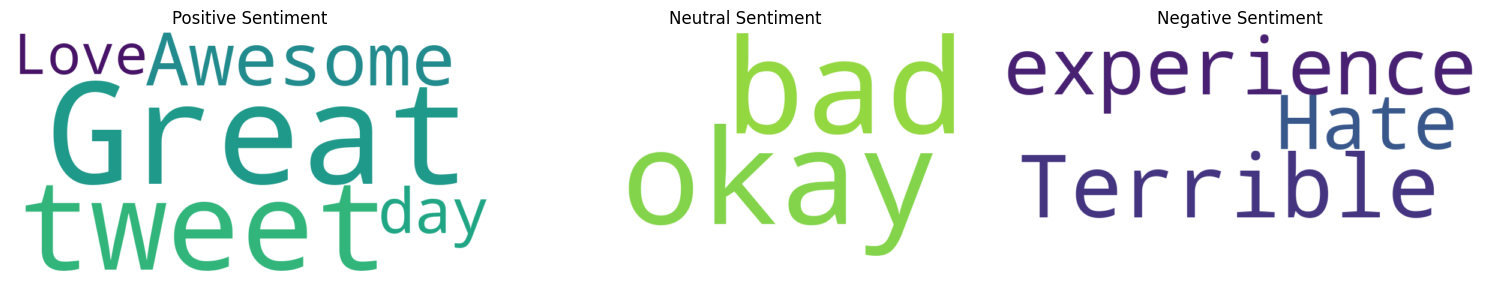

In [12]:
import pdfkit
from jinja2 import Template, Environment, FileSystemLoader
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word cloud from cleaned tweets
def generate_word_cloud(sentiment_tweets, title, background_color="white"):
    all_tweets = " ".join(sentiment_tweets)
    wordcloud = WordCloud(background_color=background_color, width=800, height=400).generate(all_tweets)
    return wordcloud

# Function to generate sentiment analysis report
def generate_sentiment_report(positive_tweets, neutral_tweets, negative_tweets, output_path):
    # Generate word clouds
    wordcloud_positive = generate_word_cloud(positive_tweets, "Word Cloud - Positive Sentiment")
    wordcloud_neutral = generate_word_cloud(neutral_tweets, "Word Cloud - Neutral Sentiment")
    wordcloud_negative = generate_word_cloud(negative_tweets, "Word Cloud - Negative Sentiment")
    
    # Generate metrics (example metrics, replace with actual metrics calculation)
    positive_count = len(positive_tweets)
    neutral_count = len(neutral_tweets)
    negative_count = len(negative_tweets)
    
    # Generate plots (example plots, replace with actual visualizations)
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Positive Sentiment')
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.title('Neutral Sentiment')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Negative Sentiment')
    plt.axis("off")

    plt.tight_layout()
    plt.savefig('sentiment_wordclouds.png')  # Save the plot as an image

    # Define template environment for HTML report
    env = Environment(loader=FileSystemLoader('.'))
    template = env.get_template('report_template.html')
    
    # Prepare data for the template
    data = {
        'positive_count': positive_count,
        'neutral_count': neutral_count,
        'negative_count': negative_count
    }
    
    # Render HTML report content
    html_content = template.render(data=data)

    # Write HTML to a file
    with open('sentiment_report.html', 'w') as f:
        f.write(html_content)

    # Convert HTML to PDF using pdfkit
    try:
        pdfkit.from_file('sentiment_report.html', output_path, configuration=pdfkit.configuration(wkhtmltopdf='"C:\Program Files\wkhtmltopdf'))
    except Exception as e:
        print(f"Error converting HTML to PDF: {str(e)}")

    # Remove temporary files
    os.remove('sentiment_report.html')
    os.remove('sentiment_wordclouds.png')

# Example usage (replace with your actual data)
positive_tweets = ["Great tweet!", "Awesome day!", "Love it!"]
neutral_tweets = ["Just okay.", "Not bad."]
negative_tweets = ["Terrible experience.", "Hate it."]

generate_sentiment_report(positive_tweets, neutral_tweets, negative_tweets, 'sentiment_analysis_report.pdf')


In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual  # Assuming you have these imports
import ipywidgets as widgets
import pandas as pd
from wordcloud import WordCloud  # Import WordCloud if not already imported

# Load predicted_tweets DataFrame
predicted_tweets = pd.read_csv("mobile_phone_tweets_balanced.csv")  # Replace with your data path

# Define remove_specific_words function
def remove_specific_words(tweet, words_to_remove, min_length=3):
    words = tweet.split()
    filtered_words = [word for word in words if word.lower() not in words_to_remove and len(word) >= min_length]
    return ' '.join(filtered_words)

# Define generate_word_cloud function
def generate_word_cloud(sentiment_tweets, title, background_color="white"):
    if not sentiment_tweets:
        print(f"No tweets available to generate word cloud for: {title}")
        return None
    
    all_tweets = " ".join(sentiment_tweets)
    wordcloud = WordCloud(background_color=background_color, width=800, height=400).generate(all_tweets)
    return wordcloud

# Function to filter and display tweets based on user selections
def filter_and_display_sentiments(sentiment, keyword):
    filtered_tweets = predicted_tweets
    
    # Filter by sentiment category
    if sentiment != "All":
        filtered_tweets = filtered_tweets[predicted_tweets['sentiment'] == sentiment]
    
    # Filter by keyword
    if keyword:
        filtered_tweets = filtered_tweets[filtered_tweets['content'].str.contains(keyword, case=False)]
    
    # Display word cloud for filtered tweets
    brand_names = ['iphone', 'samsung', 'galaxy', 'google', 'pixel', 'oneplus', 'xiaomi']
    cleaned_tweets = [remove_specific_words(tweet, brand_names, min_length=3) for tweet in filtered_tweets['content']]
    generate_word_cloud(cleaned_tweets, f"Word Cloud - Sentiment: {sentiment}")

# Interactive widget for filtering
sentiment_dropdown = widgets.Dropdown(
    options=['All', 'positive', 'neutral', 'negative'],
    value='All',
    description='Sentiment:'
)

keyword_textbox = widgets.Text(
    value='',
    placeholder='Type keyword',
    description='Keyword:'
)

# Define interaction between widgets and filtering function
interact(filter_and_display_sentiments, sentiment=sentiment_dropdown, keyword=keyword_textbox);


ModuleNotFoundError: No module named 'ipywidgets'